In [1]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\raula\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA


In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Fifa 23 Players Data.csv')
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [6]:
df = df.set_index(df['Known As'])
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
Known As,,,,,,,,,,,,,,,,,,,,,
L. Messi,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
K. Benzema,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
R. Lewandowski,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
K. De Bruyne,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
K. Mbappé,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D. Collins,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
Yang Dejiang,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
L. Mullan,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17


In [7]:
df_stats = df.iloc[:, 32:66]
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18539 entries, L. Messi to N. Rabha
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Pace Total         18539 non-null  int64
 1   Shooting Total     18539 non-null  int64
 2   Passing Total      18539 non-null  int64
 3   Dribbling Total    18539 non-null  int64
 4   Defending Total    18539 non-null  int64
 5   Physicality Total  18539 non-null  int64
 6   Crossing           18539 non-null  int64
 7   Finishing          18539 non-null  int64
 8   Heading Accuracy   18539 non-null  int64
 9   Short Passing      18539 non-null  int64
 10  Volleys            18539 non-null  int64
 11  Dribbling          18539 non-null  int64
 12  Curve              18539 non-null  int64
 13  Freekick Accuracy  18539 non-null  int64
 14  LongPassing        18539 non-null  int64
 15  BallControl        18539 non-null  int64
 16  Acceleration       18539 non-null  int64
 17  Sprint 

In [8]:
df_stats

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,...,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle
Known As,,,,,,,,,,,,,,,,,,,,,
L. Messi,81,89,90,94,34,64,84,90,70,91,...,68,91,44,40,93,94,75,96,20,35
K. Benzema,80,88,83,87,39,78,75,92,90,89,...,82,80,63,39,92,89,84,90,43,24
R. Lewandowski,75,91,79,86,44,83,71,94,91,84,...,87,84,81,49,94,81,90,88,35,42
K. De Bruyne,74,88,93,87,64,77,94,85,55,93,...,74,91,75,66,88,94,83,89,68,65
K. Mbappé,97,89,80,92,36,76,78,93,72,85,...,76,82,64,38,92,83,80,88,26,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D. Collins,68,48,43,51,31,33,40,49,30,42,...,31,46,37,22,50,52,40,47,39,29
Yang Dejiang,55,37,41,47,48,39,34,33,44,46,...,35,35,52,46,35,40,33,45,46,50
L. Mullan,64,40,49,52,37,35,41,36,42,54,...,31,36,39,24,42,50,43,59,39,37


In [9]:
df_stats.describe()

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,...,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle
count,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,68.017746,53.777874,58.024327,63.109553,50.241383,64.775338,49.476833,46.255300,51.846755,59.072226,...,65.152004,46.825719,55.668537,46.853282,50.520362,54.191542,47.994444,58.036625,46.747505,48.399159
std,10.649511,13.619867,9.717950,9.336566,16.392532,9.577715,17.887405,19.623881,17.318947,14.287698,...,12.622774,19.362064,16.905505,20.666647,19.660034,13.478006,15.730026,12.036272,20.350228,21.191644
min,28.000000,16.000000,25.000000,28.000000,15.000000,30.000000,6.000000,3.000000,5.000000,10.000000,...,25.000000,4.000000,10.000000,3.000000,2.000000,10.000000,6.000000,13.000000,3.000000,6.000000
25%,62.000000,44.000000,52.000000,58.000000,36.000000,58.000000,39.000000,31.000000,44.000000,55.000000,...,57.000000,32.000000,45.000000,26.000000,40.000000,45.000000,39.000000,51.000000,29.000000,28.000000
50%,69.000000,56.000000,59.000000,64.000000,54.000000,66.000000,54.000000,50.000000,55.000000,62.000000,...,66.000000,51.000000,58.000000,54.000000,56.000000,56.000000,49.000000,59.000000,53.000000,56.000000
75%,75.000000,64.000000,65.000000,69.000000,64.000000,72.000000,63.000000,62.000000,64.000000,68.000000,...,74.000000,62.000000,68.000000,64.000000,64.000000,64.000000,60.000000,66.000000,63.000000,66.000000
max,97.000000,92.000000,93.000000,94.000000,91.000000,91.000000,94.000000,94.000000,93.000000,93.000000,...,96.000000,91.000000,95.000000,91.000000,96.000000,94.000000,92.000000,96.000000,92.000000,93.000000


In [17]:
x_std = scale(df_stats)
x_std = pd.DataFrame(x_std, columns=df_stats.columns)
x_std.head(5)

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,...,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle
0,1.219080,2.586154,3.290461,3.308634,-0.990806,-0.080955,1.930079,2.229217,1.048201,2.234694,...,0.225630,2.281548,-0.690240,-0.331620,2.160769,2.953666,1.716862,3.154166,-1.314394,-0.632302
1,1.125176,2.512730,2.570125,2.558874,-0.685781,1.380811,1.426918,2.331136,2.203037,2.094710,...,1.334766,1.713411,0.433685,-0.380008,2.109903,2.582682,2.289032,2.655659,-0.184155,-1.151389
2,0.655658,2.733003,2.158504,2.451765,-0.380756,1.902871,1.203291,2.433055,2.260778,1.744749,...,1.730886,1.920006,1.498455,0.103876,2.211635,1.989106,2.670478,2.489490,-0.577282,-0.301974
3,0.561755,2.512730,3.599176,2.558874,0.839345,1.276400,2.489146,1.974418,0.182074,2.374678,...,0.700974,2.281548,1.143532,0.926480,1.906439,2.953666,2.225457,2.572575,1.044365,0.783388
4,2.721537,2.586154,2.261410,3.094417,-0.868796,1.171988,1.594638,2.382096,1.163684,1.814741,...,0.859422,1.816709,0.492839,-0.428397,2.109903,2.137500,2.034734,2.489490,-1.019549,-0.679492


In [19]:
x_std.describe().round(2)

,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,...,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle
count,18539.00,18539.00,18539.00,18539.00,18539.00,18539.00,18539.00,18539.00,18539.00,18539.00,...,18539.00,18539.00,18539.00,18539.00,18539.00,18539.00,18539.00,18539.00,18539.00,18539.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.76,-2.77,-3.40,-3.76,-2.15,-3.63,-2.43,-2.20,-2.71,-3.43,...,-3.18,-2.21,-2.70,-2.12,-2.47,-3.28,-2.67,-3.74,-2.15,-2.00
25%,-0.57,-0.72,-0.62,-0.55,-0.87,-0.71,-0.59,-0.78,-0.45,-0.29,...,-0.65,-0.77,-0.63,-1.01,-0.54,-0.68,-0.57,-0.58,-0.87,-0.96
50%,0.09,0.16,0.10,0.10,0.23,0.13,0.25,0.19,0.18,0.20,...,0.07,0.22,0.14,0.35,0.28,0.13,0.06,0.08,0.31,0.36
75%,0.66,0.75,0.72,0.63,0.84,0.75,0.76,0.80,0.70,0.62,...,0.70,0.78,0.73,0.83,0.69,0.73,0.76,0.66,0.80,0.83
max,2.72,2.81,3.60,3.31,2.49,2.74,2.49,2.43,2.38,2.37,...,2.44,2.28,2.33,2.14,2.31,2.95,2.80,3.15,2.22,2.10


In [20]:
pca =PCA()
pca_result = pca.fit_transform(x_std)

In [23]:
pca_result = pd.DataFrame(pca_result)
pca_result

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-9.975371,-4.866192,3.335957,-1.004531,-0.138966,-0.795360,1.591750,-0.402676,0.641949,0.848844,...,0.302835,0.661738,0.282562,-0.289021,-0.016674,-0.014034,0.032154,-0.025969,0.008170,0.041313
1,-9.072072,-2.653909,4.169132,1.277173,-1.332037,-0.241483,1.519781,-0.181162,0.505595,0.572479,...,-0.119303,-0.281358,-0.147492,-0.099429,-0.450330,-0.101774,-0.076033,-0.008416,-0.005273,-0.010214
2,-9.243643,-1.806516,4.481015,1.924321,-1.231388,-0.895324,0.740375,0.282092,-0.494926,0.683889,...,-0.160809,0.365559,0.233825,-0.235630,-0.141766,-0.008372,-0.050319,-0.015624,0.012942,0.087032
3,-10.237509,-1.228064,4.345744,-1.755678,0.567273,0.460999,-0.060709,0.089251,-0.059228,0.346411,...,-0.027755,-0.140586,-0.033176,-0.061787,0.040161,-0.005788,-0.053237,-0.039085,-0.009983,0.049121
4,-9.481112,-3.845517,2.673052,0.381129,-3.166051,0.204223,1.268817,-0.025432,-0.086422,0.388592,...,-0.111444,0.416901,0.248894,-0.234871,-0.035218,-0.084109,-0.066419,0.011734,0.004555,0.020223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,3.219099,-3.440064,-3.500770,-0.050482,2.385751,-0.035846,0.060248,1.433865,-0.110529,-0.042594,...,-0.115011,-0.628285,-0.099482,0.109433,0.037801,0.003900,-0.018758,0.015485,0.040359,-0.006715
18535,4.151529,-0.158294,-3.081320,-0.606723,2.443593,-1.412770,0.603402,0.899042,-0.991245,-0.895393,...,0.120275,-0.043456,0.173935,0.041065,-0.011924,0.039592,-0.014301,0.009571,-0.018614,-0.039624
18536,2.818924,-2.055143,-2.769418,-0.664163,2.417793,-0.934841,1.142866,1.049898,0.445960,-0.603809,...,0.291677,-0.420956,-0.013886,0.095572,0.232760,-0.156607,-0.028922,0.000802,0.010044,-0.059819
18537,7.278196,1.634317,-4.344486,0.810922,1.796869,-2.112652,-0.128639,1.390716,-1.238076,-0.011820,...,0.401205,0.059378,0.216916,-0.071097,-0.080612,-0.136658,-0.007564,0.029525,-0.000908,-0.021047


In [21]:
pca.explained_variance_ratio_

array([4.87938901e-01, 1.79157570e-01, 9.11209888e-02, 5.85499506e-02,
       4.90189879e-02, 1.93896026e-02, 1.40837100e-02, 1.06038435e-02,
       9.91354109e-03, 8.41624217e-03, 7.55296084e-03, 7.19324622e-03,
       6.06341940e-03, 5.94859375e-03, 5.53003824e-03, 4.72533125e-03,
       4.57324531e-03, 3.87765989e-03, 3.66665140e-03, 3.22126230e-03,
       3.07446018e-03, 2.51835333e-03, 1.95108783e-03, 1.90459600e-03,
       1.72395220e-03, 1.62914002e-03, 1.51557627e-03, 1.45230500e-03,
       1.20252564e-03, 9.40739487e-04, 8.23728651e-04, 4.71999355e-04,
       1.69445422e-04, 7.63440405e-05])

In [22]:
pca.explained_variance_ratio_.cumsum()

array([0.4879389 , 0.66709647, 0.75821746, 0.81676741, 0.8657864 ,
       0.885176  , 0.89925971, 0.90986355, 0.9197771 , 0.92819334,
       0.9357463 , 0.94293955, 0.94900296, 0.95495156, 0.9604816 ,
       0.96520693, 0.96978017, 0.97365783, 0.97732448, 0.98054575,
       0.98362021, 0.98613856, 0.98808965, 0.98999424, 0.9917182 ,
       0.99334734, 0.99486291, 0.99631522, 0.99751774, 0.99845848,
       0.99928221, 0.99975421, 0.99992366, 1.        ])

In [25]:
[f'PC{i}' for i in range(1, pca_result.shape[1]+1)]

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34']

In [27]:
pca_result.columns=[f'PC{i}' for i in range(1, pca_result.shape[1]+1)]

<Axes: ylabel='PC1'>

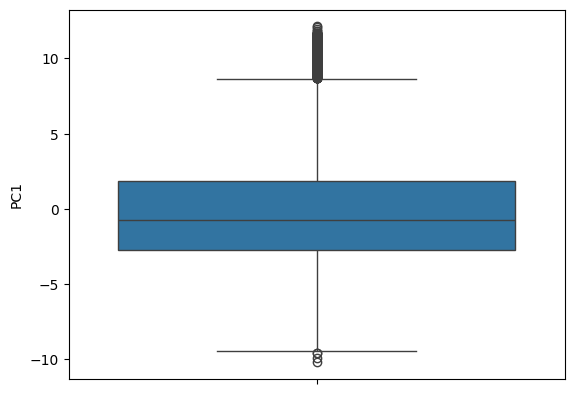

In [28]:
fig, ax = plt.subplots()
sns.boxplot(data = pca_result, y='PC1', ax = ax)

<Axes: xlabel='PC1', ylabel='PC2'>

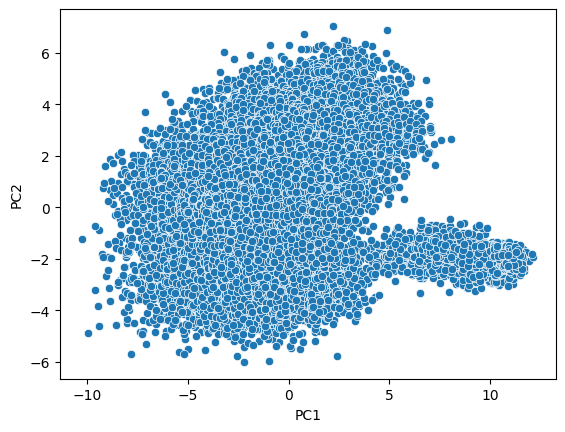

In [29]:
fig, ax = plt.subplots()
sns.scatterplot(data= pca_result, x = 'PC1', y = 'PC2', ax = ax)

<Axes: ylabel='PC4'>

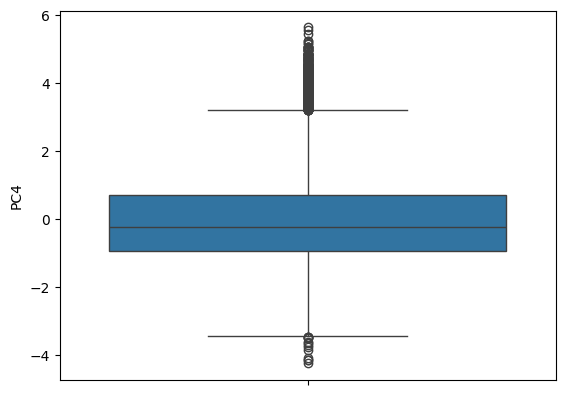

In [34]:
fig, ax = plt.subplots()
sns.boxplot(data = pca_result, y = 'PC4', ax = ax)